# Блок 1.

С помощью symPy найдите полиномы, описывающие данные наборы точек. Затем проведите полное исследование каждого полученного полинома: проверьте четность/нечетность, найдите нули, промежутки знакопостоянства. Постройте их графики. С помощью изменения промежутка для х добейтесь того, чтобы все нули были отображены на графике функции. <br><br><br>
а) $(-4; -4268), (-3; -1227), (-1; -17), (1; 17), (3; 1227), (4; 4268)$<br><br>
б)$ (-4; -16729), (-3; -3999), (-1; 5), (1; 1), (3; 4005), (4; 16735)$


In [ ]:
from sympy import *

a0, a1, a2, a3, a4, a5 = symbols('a0, a1, a2, a3, a4, a5')

# Блок 2.

In [ ]:
from sympy import *
from sympy.plotting import plot
init_printing(use_unicode=False, wrap_line=False, no_global=True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x = Symbol('x')

## 1.
### Получите значение MSE меньшее 5.

In [ ]:
def print_points_ands_function1(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([2, -4, 1, 8, 21, 40, 47, 65, 75, 92])
    plt.xlim(-6, 10)
    plt.ylim(-1, 100)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

In [ ]:
f1 = 48 * x**2 - 128 * x + 83
f1

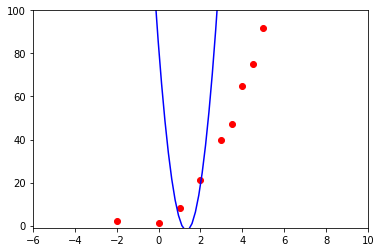

MSE = 93691.3


In [ ]:
print_points_ands_function1(f1)

## 2.
### Получите значение MSE меньшее 35.

In [ ]:
def print_points_ands_function2(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([-31, -9, 4, -1, 9, 24, 47, 92, 120, 170])
    plt.xlim(-3, 6)
    plt.ylim(-35, 200)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

In [ ]:
f2 = 4 * x**3 + 30 * x**2 + 74 * x + 62
f2

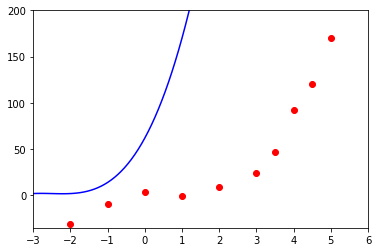

MSE = 607200.2


In [ ]:
print_points_ands_function2(f2)

## 3.
### Получите значение MSE меньшее 3300.

In [ ]:
def print_points_ands_function3(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([60, 25, 4, -0, -57, -195, -295, -540, -700, -760])
    plt.xlim(-10, 6)
    plt.ylim(-850, 100)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

In [ ]:
f3 = -36 * x**3 - 756 * x**2 - 5334 * x - 12636
f3

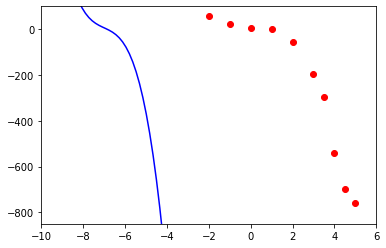

MSE = 1346344545.35


In [ ]:
print_points_ands_function3(f3)

## 4.
### Получите значение MSE меньшее 25.

In [ ]:
def print_points_ands_function4(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([-42, -37, -23, -36, -45, -80, -83, -110, -131, -155])
    plt.xlim(-4, 20)
    plt.ylim(-160, -10)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

In [ ]:
f4 = - 5 / 4 * x**2 + 25 * x - 152
f4

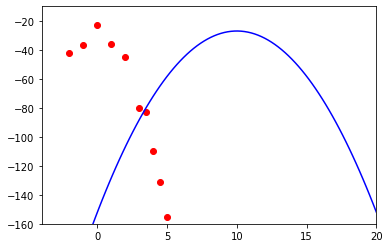

MSE = 9143.51953125


In [ ]:
print_points_ands_function4(f4)